
# Descriptive Statistics: The describe() function provides an overview of the 'Value' column's statistical properties. It offers insights into the central tendency, dispersion, and distribution of the investment values.

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
#List of countries to keep
countries_to_keep = ['Ireland', 'Austria', 'Belgium', 'Denmark', 'Finland', 'Greece',
                     'Luxembourg', 'Netherlands', 'Norway', 'Sweden', 'Switzerland']

In [3]:
# Read the first CSV files into a DataFrame
pd_investment = pd.read_csv('Transport infrastructure_Investment Spending.csv')
# Read the second CSV file into another DataFrame
pd_maintenance = pd.read_csv('Transport infrastructure_Maintenance Spending.csv')
# Read the third CSV file into another DataFrame
pd_capital_value = pd.read_csv('Transport infrastructure_Capital Value.csv')
# Read the second CSV file into another DataFrame
pd_overview = pd.read_csv('Transport infrastructure_Overview.csv')

In [4]:
# Display rows and columns in the DataFrame
print(pd_investment.shape)
print(pd_maintenance.shape)
print(pd_capital_value.shape)
print(pd_overview.shape)

(19099, 17)
(11055, 17)
(6195, 17)
(11655, 17)


In [5]:
# Join 4 DataFrames and create only one
concatenate_date = pd.concat([pd_investment,pd_maintenance,pd_capital_value,pd_overview], axis=0, ignore_index = True)
concatenate_date

,COUNTRY,Country,VARIABLE,Variable,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2000,2000,ALL,Lek,0,Units,NaN,NaN,1.464200e+10,NaN,NaN
1,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2001,2001,ALL,Lek,0,Units,NaN,NaN,1.400300e+10,NaN,NaN
2,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2002,2002,ALL,Lek,0,Units,NaN,NaN,9.275000e+09,NaN,NaN
3,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2003,2003,ALL,Lek,0,Units,NaN,NaN,8.460000e+09,NaN,NaN
4,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2004,2004,ALL,Lek,0,Units,NaN,NaN,1.189600e+10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47999,CHL,Chile,I-INV-MTN-RD,Total road spending,EUR_CONST,Constant Euro,2017,2017,EUR,Euro,0,Units,NaN,NaN,1.921293e+09,P,Provisional value
48000,CHL,Chile,I-INV-MTN-RD,Total road spending,EUR_CONST,Constant Euro,2018,2018,EUR,Euro,0,Units,NaN,NaN,1.752731e+09,P,Provisional value
48001,CHL,Chile,I-INV-MTN-RD,Total road spending,EUR_CONST,Constant Euro,2019,2019,EUR,Euro,0,Units,NaN,NaN,1.910727e+09,P,Provisional value
48002,CHL,Chile,I-INV-MTN-RD,Total road spending,EUR_CONST,Constant Euro,2020,2020,EUR,Euro,0,Units,NaN,NaN,1.642003e+09,P,Provisional value


In [6]:
# Drop specified columns in the new DataFrame
columns_to_drop = ['COUNTRY', 'VARIABLE', 'MEASURE', 'YEAR', 'Unit Code','Unit', 'PowerCode Code', 
                   'PowerCode', 'Reference Period Code','Reference Period', 'Flag Codes', 'Flags']

In [7]:
# Cleaning process for the first DataFrame (pd_investment)
concatenate_date = concatenate_date.drop(columns=columns_to_drop, axis=1)
concatenate_date

,Country,Variable,Measure,Year,Value
0,Albania,Total inland transport infrastructure investment,National currency,2000,1.464200e+10
1,Albania,Total inland transport infrastructure investment,National currency,2001,1.400300e+10
2,Albania,Total inland transport infrastructure investment,National currency,2002,9.275000e+09
3,Albania,Total inland transport infrastructure investment,National currency,2003,8.460000e+09
4,Albania,Total inland transport infrastructure investment,National currency,2004,1.189600e+10
...,...,...,...,...,...
47999,Chile,Total road spending,Constant Euro,2017,1.921293e+09
48000,Chile,Total road spending,Constant Euro,2018,1.752731e+09
48001,Chile,Total road spending,Constant Euro,2019,1.910727e+09
48002,Chile,Total road spending,Constant Euro,2020,1.642003e+09


In [8]:
# Use constant euro because it is an exchange rates used by eliminating the effects of foreign currency fluctuations in financial statements
concatenate_date = concatenate_date[concatenate_date['Measure'] == 'Constant Euro']
concatenate_date

,Country,Variable,Measure,Year,Value
262,Albania,Total inland transport infrastructure investment,Constant Euro,2000,1.008693e+08
263,Albania,Total inland transport infrastructure investment,Constant Euro,2001,9.070534e+07
264,Albania,Total inland transport infrastructure investment,Constant Euro,2002,7.692671e+07
265,Albania,Total inland transport infrastructure investment,Constant Euro,2003,6.842285e+07
266,Albania,Total inland transport infrastructure investment,Constant Euro,2004,9.326190e+07
...,...,...,...,...,...
47999,Chile,Total road spending,Constant Euro,2017,1.921293e+09
48000,Chile,Total road spending,Constant Euro,2018,1.752731e+09
48001,Chile,Total road spending,Constant Euro,2019,1.910727e+09
48002,Chile,Total road spending,Constant Euro,2020,1.642003e+09


In [9]:
# Countries_to_keep = 'Ireland', 'Austria', 'Belgium', 'Denmark', 'Finland', 'Greece', Luxembourg', 'Netherlands', 'Norway', 'Sweden', 'Switzerland'
concatenate_date = concatenate_date[concatenate_date['Country'].isin(countries_to_keep)]
concatenate_date.to_csv('concatenate_result1.csv', index=False)
concatenate_date

,Country,Variable,Measure,Year,Value
1239,Austria,Total inland transport infrastructure investment,Constant Euro,2000,2.198050e+09
1240,Austria,Total inland transport infrastructure investment,Constant Euro,2001,2.203724e+09
1241,Austria,Total inland transport infrastructure investment,Constant Euro,2002,2.195319e+09
1242,Austria,Total inland transport infrastructure investment,Constant Euro,2003,2.259999e+09
1243,Austria,Total inland transport infrastructure investment,Constant Euro,2004,2.553691e+09
...,...,...,...,...,...
46902,Switzerland,Total road spending,Constant Euro,2016,6.802047e+09
46903,Switzerland,Total road spending,Constant Euro,2017,6.912505e+09
46904,Switzerland,Total road spending,Constant Euro,2018,6.894640e+09
46905,Switzerland,Total road spending,Constant Euro,2019,7.139519e+09


In [10]:
# Drop NaN values, and display information for the first DataFrame
pd.options.display.float_format = '{:.2f}'.format
concatenate_date.dropna(inplace=True)
concatenate_date.to_csv('concatenate_result2.csv', index=False)
concatenate_date

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17104\2431616253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenate_date.dropna(inplace=True)


,Country,Variable,Measure,Year,Value
1239,Austria,Total inland transport infrastructure investment,Constant Euro,2000,2198050334.99
1240,Austria,Total inland transport infrastructure investment,Constant Euro,2001,2203724449.80
1241,Austria,Total inland transport infrastructure investment,Constant Euro,2002,2195318643.66
1242,Austria,Total inland transport infrastructure investment,Constant Euro,2003,2259998588.47
1243,Austria,Total inland transport infrastructure investment,Constant Euro,2004,2553691459.10
...,...,...,...,...,...
46902,Switzerland,Total road spending,Constant Euro,2016,6802047246.49
46903,Switzerland,Total road spending,Constant Euro,2017,6912505087.00
46904,Switzerland,Total road spending,Constant Euro,2018,6894640075.30
46905,Switzerland,Total road spending,Constant Euro,2019,7139518917.18


In [11]:
# Display duplicated rows if there are duplicated values
duplicated_rows = concatenate_date[concatenate_date.duplicated()]
duplicated_rows

,Country,Variable,Measure,Year,Value
37095,Austria,Total inland transport infrastructure investment,Constant Euro,2000,2198050334.99
37096,Austria,Total inland transport infrastructure investment,Constant Euro,2001,2203724449.80
37097,Austria,Total inland transport infrastructure investment,Constant Euro,2002,2195318643.66
37098,Austria,Total inland transport infrastructure investment,Constant Euro,2003,2259998588.47
37099,Austria,Total inland transport infrastructure investment,Constant Euro,2004,2553691459.10
...,...,...,...,...,...
46860,Switzerland,Road infrastructure investment,Constant Euro,2016,4048150712.15
46861,Switzerland,Road infrastructure investment,Constant Euro,2017,4092160388.61
46862,Switzerland,Road infrastructure investment,Constant Euro,2018,4105206716.43
46863,Switzerland,Road infrastructure investment,Constant Euro,2019,4427652197.65


In [12]:
# Remove duplicated rows (there are 498 rows to eliminate)
concatenate_date = concatenate_date.drop_duplicates()
concatenate_date

,Country,Variable,Measure,Year,Value
1239,Austria,Total inland transport infrastructure investment,Constant Euro,2000,2198050334.99
1240,Austria,Total inland transport infrastructure investment,Constant Euro,2001,2203724449.80
1241,Austria,Total inland transport infrastructure investment,Constant Euro,2002,2195318643.66
1242,Austria,Total inland transport infrastructure investment,Constant Euro,2003,2259998588.47
1243,Austria,Total inland transport infrastructure investment,Constant Euro,2004,2553691459.10
...,...,...,...,...,...
46902,Switzerland,Total road spending,Constant Euro,2016,6802047246.49
46903,Switzerland,Total road spending,Constant Euro,2017,6912505087.00
46904,Switzerland,Total road spending,Constant Euro,2018,6894640075.30
46905,Switzerland,Total road spending,Constant Euro,2019,7139518917.18


In [13]:
# Sort by countries
concatenate_date = concatenate_date.sort_values(by='Country')
concatenate_date.reset_index(drop=True, inplace=True)
concatenate_date.to_csv('concatenate_result3.csv', index=False)
concatenate_date

,Country,Variable,Measure,Year,Value
0,Austria,Total inland transport infrastructure investment,Constant Euro,2000,2198050334.99
1,Austria,Road infrastructure maintenance,Constant Euro,2011,535526826.40
2,Austria,Road infrastructure maintenance,Constant Euro,2012,549178834.10
3,Austria,Road infrastructure maintenance,Constant Euro,2013,584304523.90
4,Austria,Road infrastructure maintenance,Constant Euro,2014,682347527.70
...,...,...,...,...,...
2507,Switzerland,Road infrastructure investment: Of which motorway,Constant Euro,2012,1879963793.01
2508,Switzerland,Road infrastructure investment: Of which motorway,Constant Euro,2013,1736625933.94
2509,Switzerland,Road infrastructure investment: Of which motorway,Constant Euro,2014,1653899298.73
2510,Switzerland,Road infrastructure investment: Of which motorway,Constant Euro,2016,1544604807.89


In [14]:
# Display if there are null values
concatenate_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   2512 non-null   object 
 1   Variable  2512 non-null   object 
 2   Measure   2512 non-null   object 
 3   Year      2512 non-null   int64  
 4   Value     2512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 98.3+ KB


In [15]:
# Descriptive statistics
concatenate_date['Value'].describe()

count           2512.00
mean      4674631895.38
std      13721309389.31
min                0.00
25%        137572006.85
50%        605561732.18
75%       1843985724.90
max     106719485821.09
Name: Value, dtype: float64

In [16]:
import statistics
print(statistics.mean(concatenate_date['Value']))
print(statistics.median(concatenate_date['Value']))

4674631895.375934
605561732.178615


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17104\1401654984.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concatenate_date['Value'], kde=True)


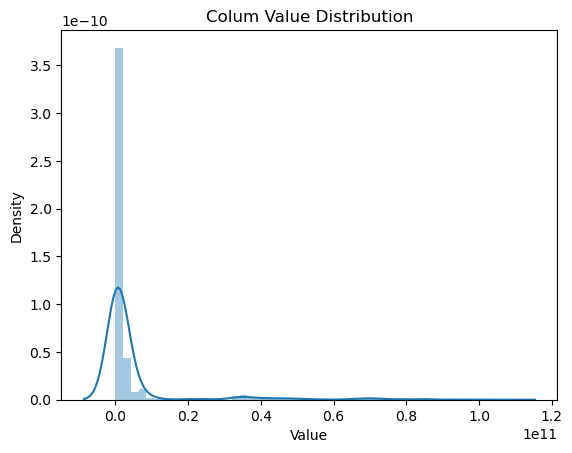

In [17]:
# Show the distribution for the 'Value column

from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(concatenate_date['Value'], kde=True)
plt.title('Colum Value Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

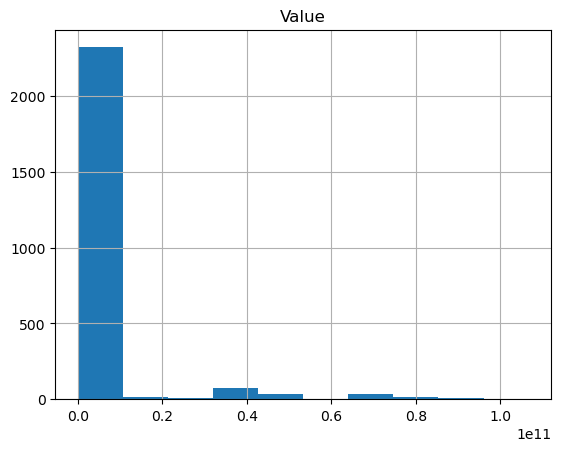

In [36]:
# Show the Histogram
concatenate_date.hist(['Value'])

<Axes: >

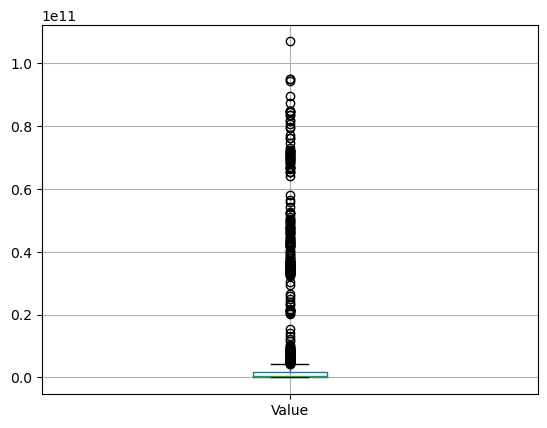

In [25]:
# Display Boxpolt to determinate outliers
import seaborn as sns
concatenate_date.boxplot(['Value'])

In [26]:
# Eliminate outliers to avoid interference in the model
import numpy as np
q1,q3 = np.percentile(concatenate_date['Value'],[25,75])
print(q1,q3)

137572006.85 1843985724.90325


In [27]:
# Verify outliers (Lower limit- Higher limit)
IQR = q3-q1
lower_limit = q1 - 1.5*(IQR)
higher_limit = q3 + 1.5*(IQR)
print(lower_limit,higher_limit)

-2422048570.229875 4403606301.983125


In [32]:
selection = ((concatenate_date['Value'] >= lower_limit) & (concatenate_date['Value'] <= higher_limit))  
concatenate_date_no_outliers = concatenate_date[selection]

<Axes: >

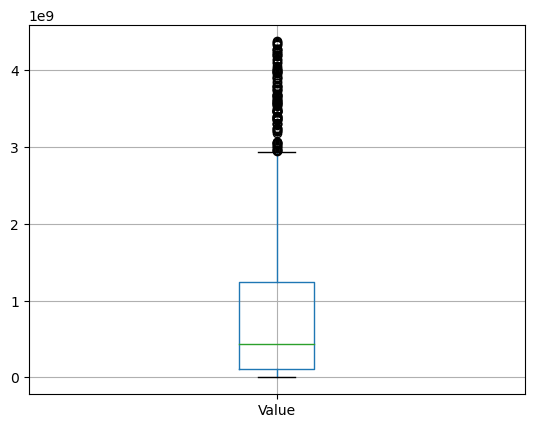

In [33]:
# New boxplot with other outliers, but these are more representative
concatenate_date_no_outliers.boxplot(['Value'])

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_17104\4050073304.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concatenate_date_no_outliers['Value'], kde=True)


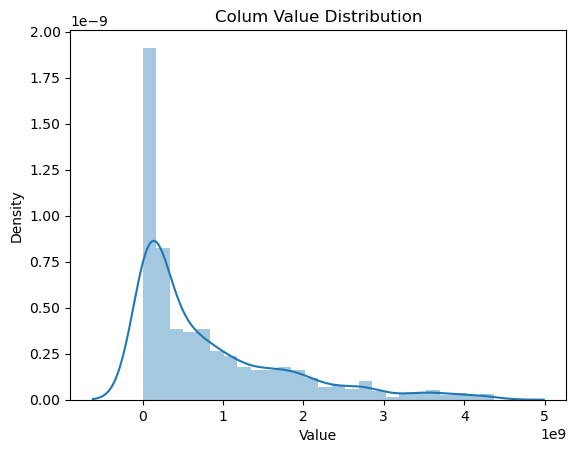

In [34]:
# Show the new distribution for the 'Value column without the initial outliers

from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(concatenate_date_no_outliers['Value'], kde=True)
plt.title('Colum Value Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

array([[<Axes: title={'center': 'Value'}>]], dtype=object)

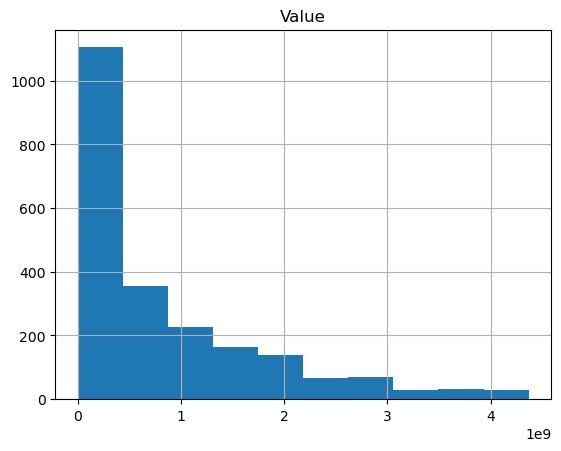

In [35]:
# Show the new Histogram (this histogram looks much better than the first one)
concatenate_date_no_outliers.hist(['Value'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'Airport infrastructure capital value'),
  Text(2, 0, 'Airport infrastructure investment'),
  Text(3, 0, 'Airport infrastructure maintenance'),
  Text(4, 0, 'Inland waterway infrastucture investment'),
  Text(5, 0, 'Inland waterway infrastucture maintenance'),
  Text(6, 0, 'Maritime port infrastructure investment'),
  Text(7, 0, 'Maritime port infrastructure maintenance'),
  Text(8, 0, 'Rail infrastructure capital value'),
  Text(9, 0, 'Rail infrastructure investment'),
  Text(10, 0, 'Rail infrastructure maintenance'),
  Text(11, 0, 'Road infrastructure capital value'),
  Text(12, 0, 'Road infrastructure capital value: Of which motorway'),
  Text(13, 0, 'Road infrastructure investment'),
  Text(14, 0, 'Road infrastructure investment: Of which motorway'),
  Text(15, 0, 'Road infrastructure maintenance'),
  Text(16, 0, 'Road infrastructure maintenance: Of which motorway'),
  Text(17

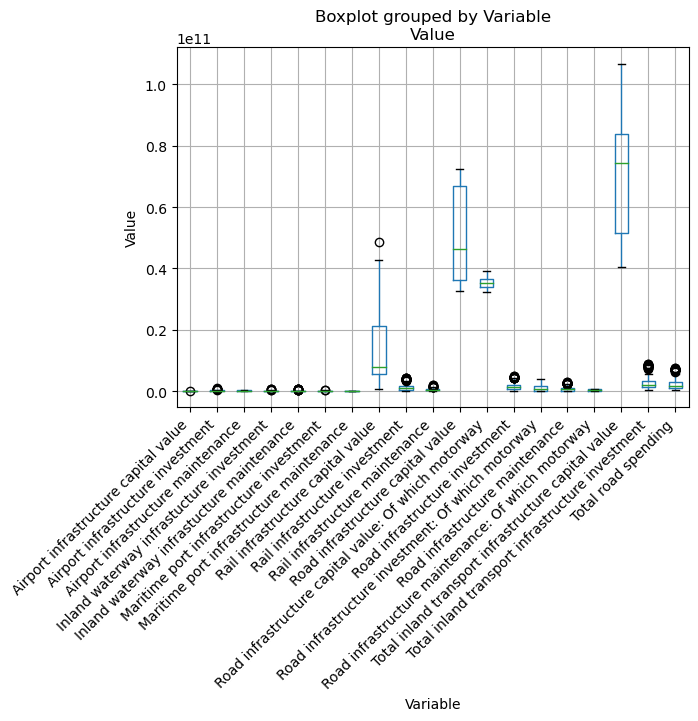

In [38]:
# Display outliers for each type of 'Variable'
concatenate_date.boxplot(['Value'], by=['Variable']) 
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')

In [45]:
# Eliminate outliers for each variable
q1 = concatenate_date.groupby('Variable')['Value'].quantile(0.25)
q3 = concatenate_date.groupby('Variable')['Value'].quantile(0.75)

# Verify outliers (Lower limit- Higher limit)
IQR = q3-q1
lower_limit = q1 - 1.5*(IQR)
higher_limit = q3 + 1.5*(IQR)

In [49]:
# Display that 
print (q1)

Variable
Airport infrastructure capital value                      29850746.27
Airport infrastructure investment                         50124982.94
Airport infrastructure maintenance                        11604119.40
Inland waterway infrastucture investment                   1550794.32
Inland waterway infrastucture maintenance                 11816365.52
Maritime port infrastructure investment                   36597565.95
Maritime port infrastructure maintenance                  28618353.66
Rail infrastructure capital value                       5563864440.53
Rail infrastructure investment                           296219728.13
Rail infrastructure maintenance                          197678131.10
Road infrastructure capital value                      36289701636.19
Road infrastructure capital value: Of which motorway   34062889859.64
Road infrastructure investment                           642157397.02
Road infrastructure investment: Of which motorway        174076407.65
Road infras

In [19]:
# Eliminate outliers to avoid interference in the model
import numpy as np
q1,q3 = np.percentile(concatenate_date['Value'],[25,75])
print(q1,q3)

137572006.85 1843985724.90325


In [51]:
concatenate_date_no_outliers = pd.DataFrame()
type_group = concatenate_date.groupby('Variable')['Value']
for tipo in type_group.groups.keys():
    is_type = concatenate_date['Variable'] == tipo
    is_in_limit = ((concatenate_date['Value'] >= lower_limit[tipo]) & (concatenate_date['Value'] <= higher_limit[tipo])) 
    selection = is_type & is_in_limit
    selection_date = concatenate_date[selection]
    concatenate_date_no_outliers = pd.concat([concatenate_date_no_outliers, selection_date])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'Airport infrastructure capital value'),
  Text(2, 0, 'Airport infrastructure investment'),
  Text(3, 0, 'Airport infrastructure maintenance'),
  Text(4, 0, 'Inland waterway infrastucture investment'),
  Text(5, 0, 'Inland waterway infrastucture maintenance'),
  Text(6, 0, 'Maritime port infrastructure investment'),
  Text(7, 0, 'Maritime port infrastructure maintenance'),
  Text(8, 0, 'Rail infrastructure capital value'),
  Text(9, 0, 'Rail infrastructure investment'),
  Text(10, 0, 'Rail infrastructure maintenance'),
  Text(11, 0, 'Road infrastructure capital value'),
  Text(12, 0, 'Road infrastructure capital value: Of which motorway'),
  Text(13, 0, 'Road infrastructure investment'),
  Text(14, 0, 'Road infrastructure investment: Of which motorway'),
  Text(15, 0, 'Road infrastructure maintenance'),
  Text(16, 0, 'Road infrastructure maintenance: Of which motorway'),
  Text(17

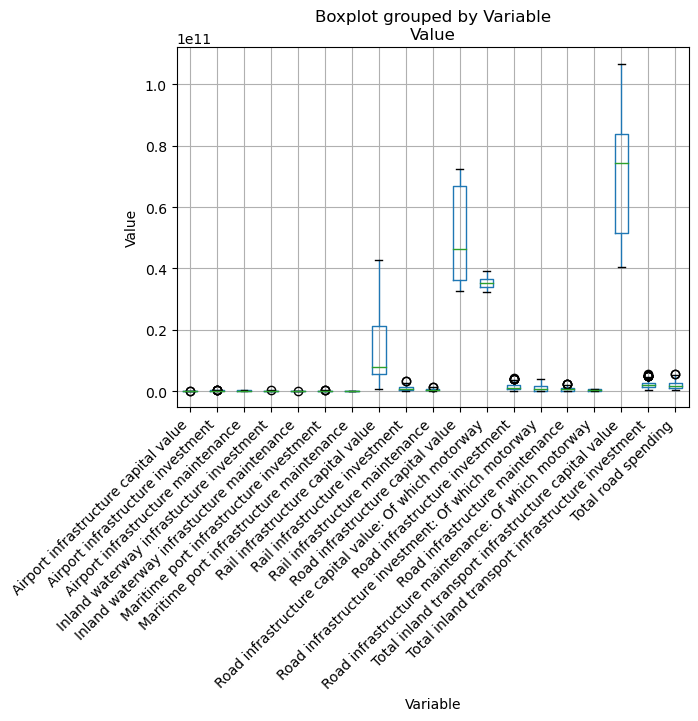

In [53]:
# New Boxplot without outliers
concatenate_date_no_outliers.boxplot(['Value'], by=['Variable'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')

-2422048570.229875 4403606301.983125
